<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap13/13_3_Neighborhood_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 13.3: Neighborhood sampling**

This notebook investigates neighborhood sampling of graphs as in figure 13.10 from the book.

# THE CORRECT AT THE FIGURE FOR THE COLUMNS SHOULD BE Hidden layer 1, Hidden layer 2, Output layer, and a fourth column should be added at left with the Input layer.

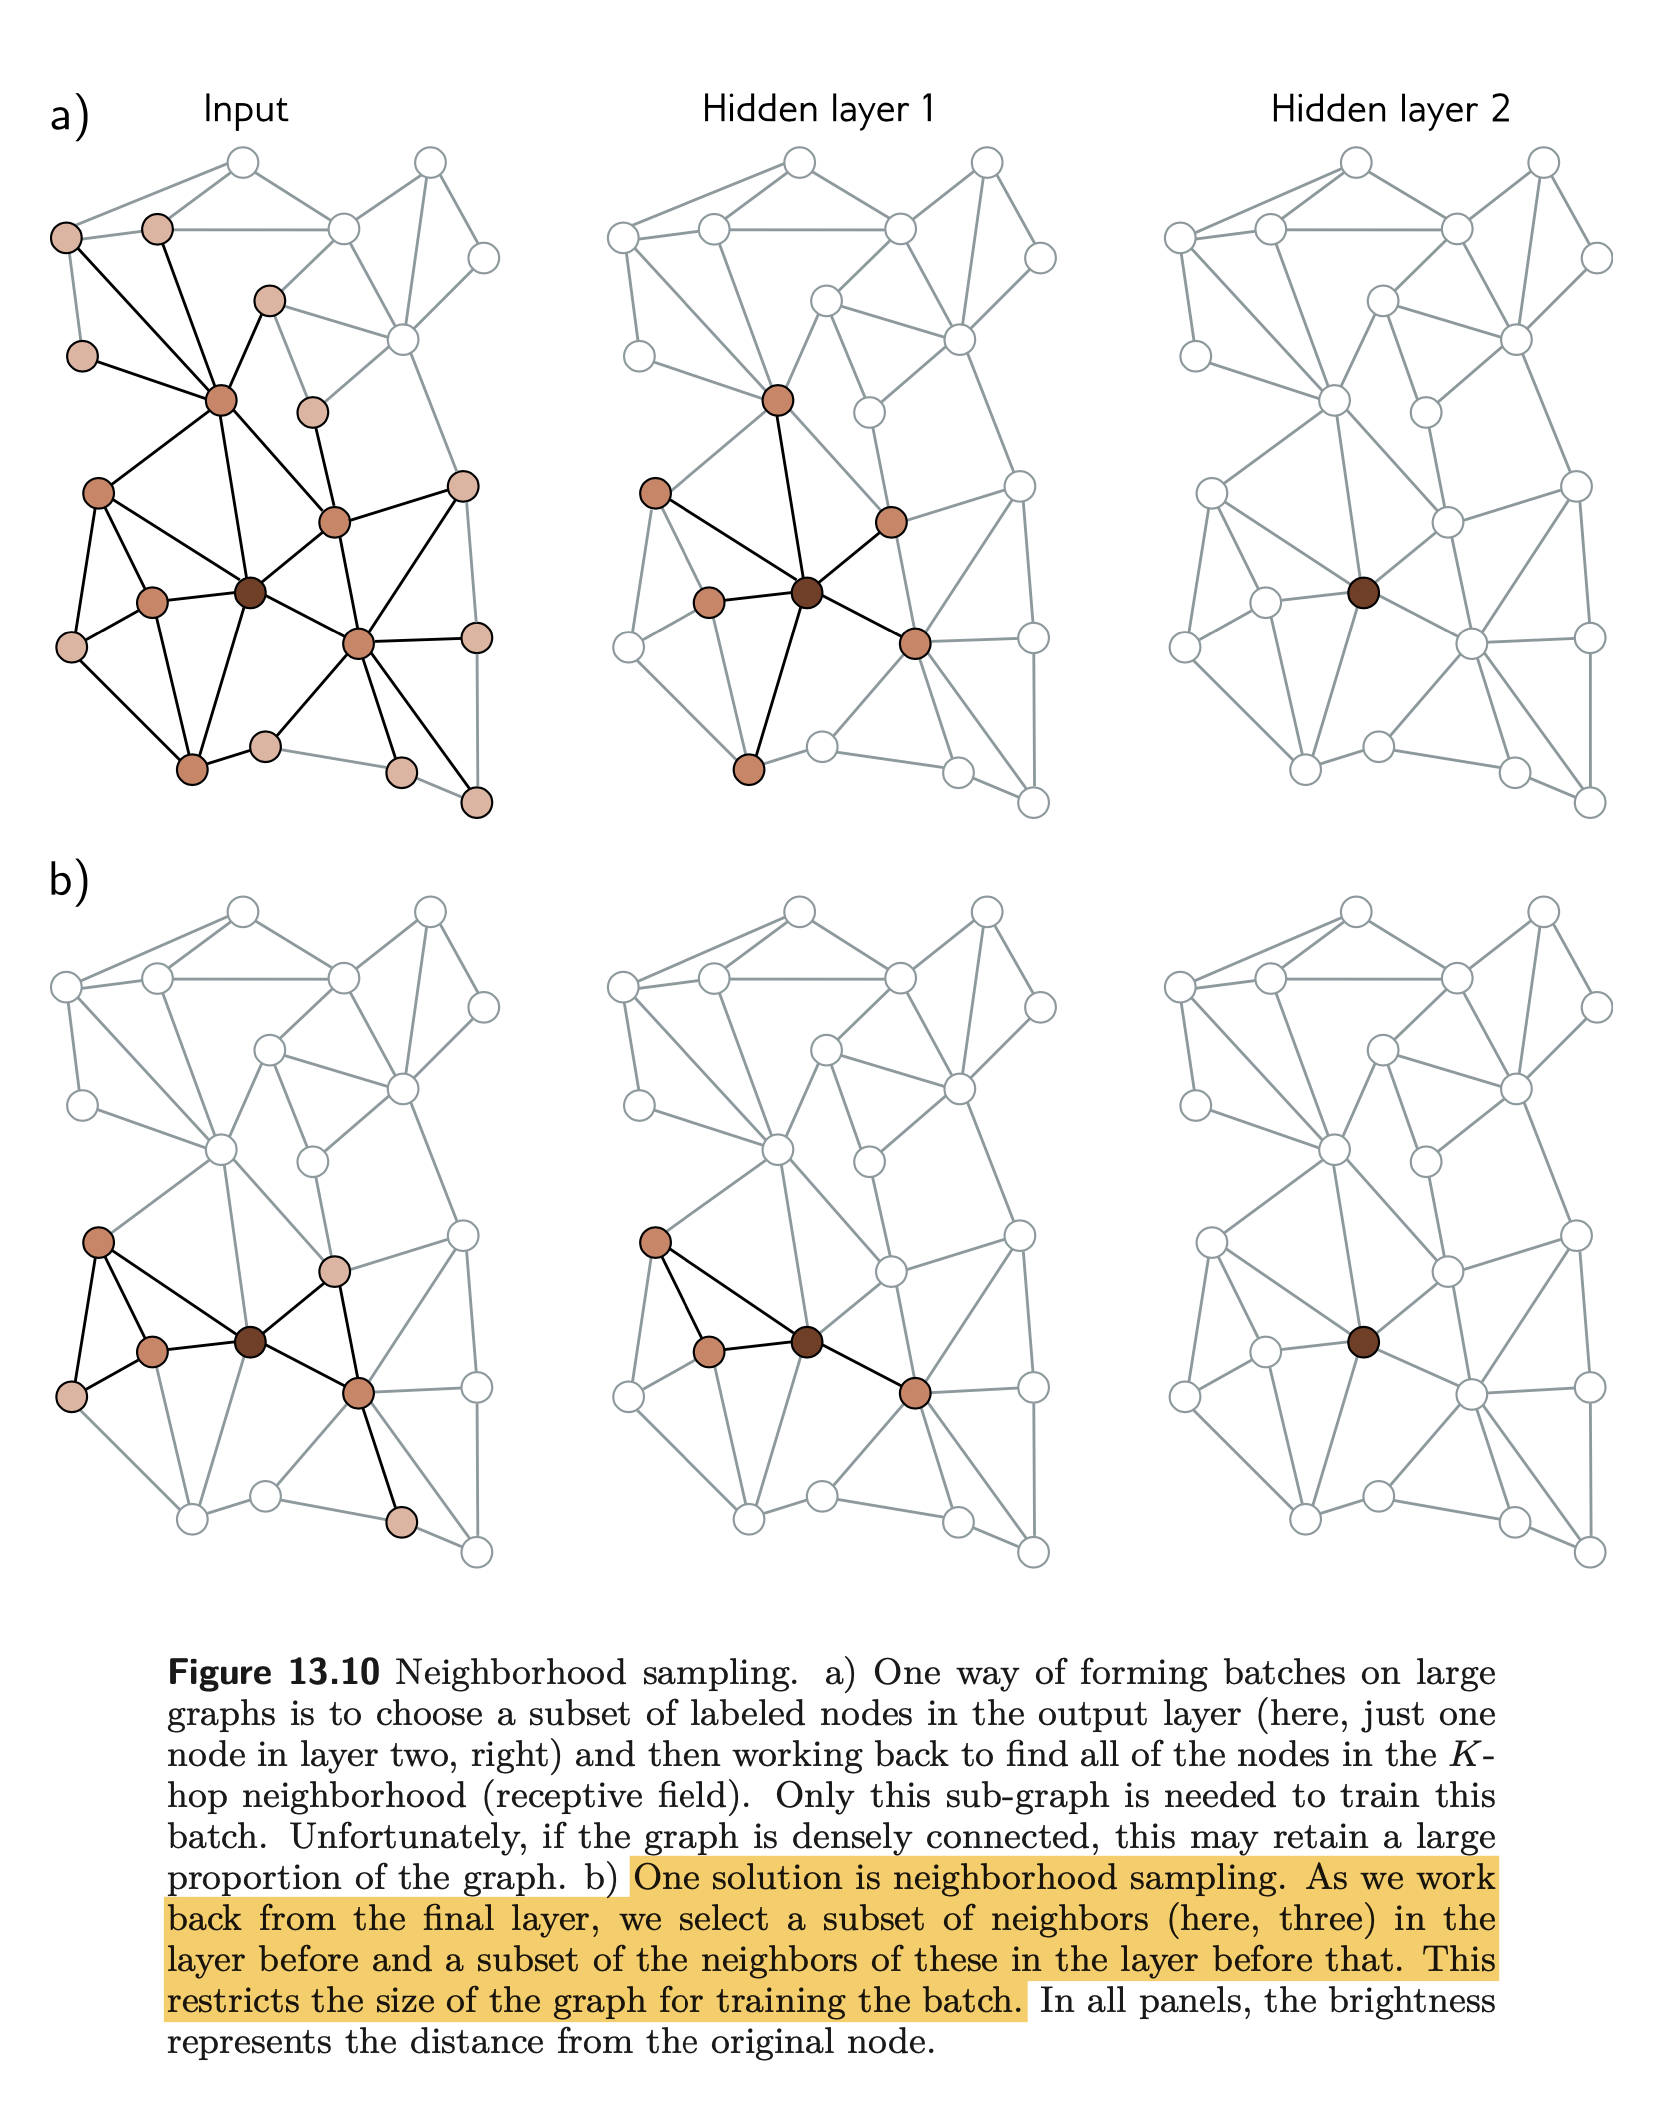

# for the example above it became clear to me that, for each step, the corresponding subgraph includes the nodes from the previous step (starting with the output layer and walking back to the input layer). 

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Let's construct the graph from figure 13.10, which has 23 nodes.

In [86]:
# Define adjacency matrix
A = np.array([[0,1,1,1,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,0,1,0,0, 0,0,0,1,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,1,0,1,0, 0,0,0,0,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,0,1,0,1, 0,1,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,0, 1,0,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,0,1, 0,0,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,0, 0,0,1,0,1, 1,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,1, 1,1,0,0,0, 1,0,0,1,0, 0,0,0,0,0, 0,0,0],
              [0,1,0,0,0, 0,0,0,0,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,1,1,0,0, 0,1,0,1,0, 0,1,1,0,0, 0,1,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,1,1,0,0, 0,0,1,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 0,0,0,0,1, 1,1,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 1,0,0,1,0, 0,1,1,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,1,0,0, 0,0,1,0,0, 0,0,1,1,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,1,0,0,0, 1,0,0,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,1,0,0,1, 0,1,0,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 0,1,1,0,0, 1,0,1,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,1,1,0, 0,1,0,1,0, 1,1,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,1,0, 0,0,1,0,0, 0,0,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,1, 1,1,0,0,0, 1,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,0,1, 0,1,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,0,0, 1,0,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,1,0, 0,1,0]]);
print(A)

[[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 

In [87]:
# Routine to draw graph structure, highlighting original node (brown in fig 13.10)
# and neighborhood nodes (orange in figure 13.10)
def draw_graph_structure(adjacency_matrix, original_node, neighborhood_nodes=None):

  G = nx.Graph()
  n_node = adjacency_matrix.shape[0]
  for i in range(n_node):
    for j in range(i):
      if adjacency_matrix[i,j]:
          G.add_edge(i,j)

  color_map = []

  for node in G:
    if original_node[node]:
      color_map.append('brown')
    else:
      if neighborhood_nodes[node]:
        color_map.append('orange')
      else:
        color_map.append('white')

  nx.draw(G, nx.spring_layout(G, seed = 7), with_labels=True,node_color=color_map)
  plt.show()

Output layer:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


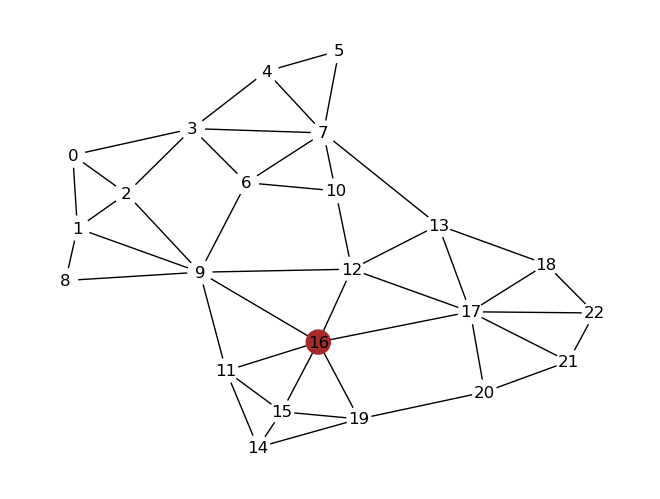

In [88]:
n_nodes = A.shape[0]

# Define a single output layer node
output_layer_nodes=np.zeros((n_nodes,1)); output_layer_nodes[16]=1
# Define the neighboring nodes to draw (none)
neighbor_nodes = np.zeros((n_nodes,1))
print("Output layer:")
print(output_layer_nodes.T)
draw_graph_structure(A, output_layer_nodes, neighbor_nodes)

Let's imagine that we want to form a batch for a node labelling task that consists of just node 16 in the output layer (highlighted).   The network consists of the input, hidden layer 1, hidden layer2, and the output layer.

In [89]:
def onehot(col):
    
    output = np.zeros((n_nodes))
    output[col] = 1
    
    return(output)

In [90]:
# TODO Find the nodes in hidden layer 2 that connect to node 16 in the output layer
# using the adjacency matrix
# Replace this line:

# output layer (single node 16)
X = onehot(16)

# adjacent nodes to node 16
hidden_layer2_nodes = np.matmul(A,X)

Hidden layer 2:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


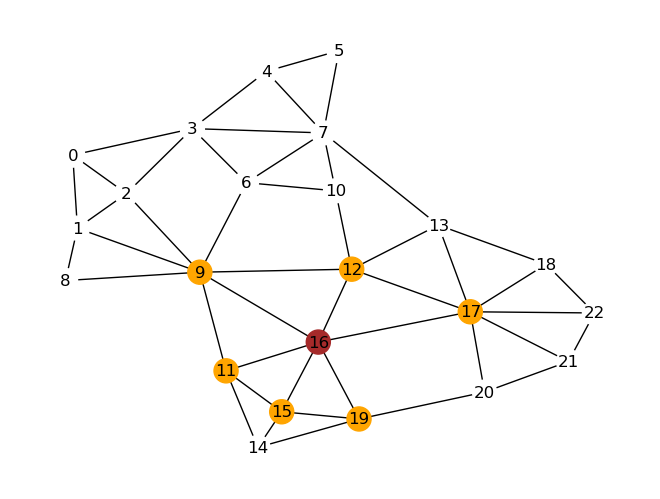

In [91]:
print("Hidden layer 2:")
print(hidden_layer2_nodes.T)  
draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)

In [92]:
def norm_array(v):
    out = []
    for node in v:
        if node != 0:
            out.append(1)
        else:
            out.append(0)
    return(out)        

Hidden layer 1:
[0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


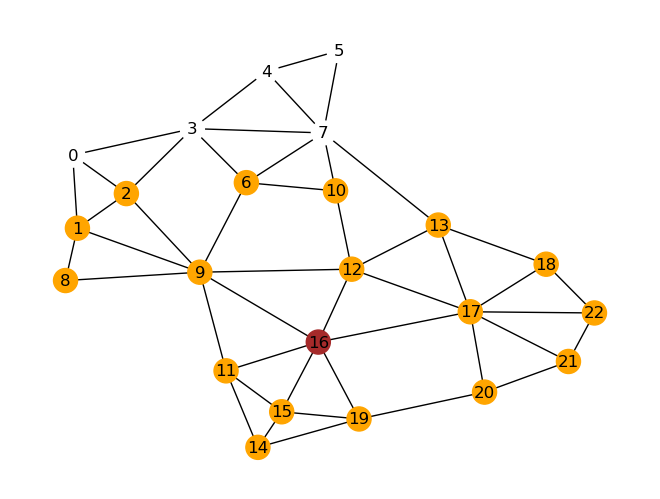

In [93]:
# TODO - Find the nodes in hidden layer 1 that connect to node 16 in the output layer
# using the adjacency matrix
# Replace this line:
A2 = np.matmul(A,A)
hidden_layer1_nodes = norm_array(np.matmul(A2,X))

print("Hidden layer 1:")
print(hidden_layer1_nodes)
draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes)

Input layer:
[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


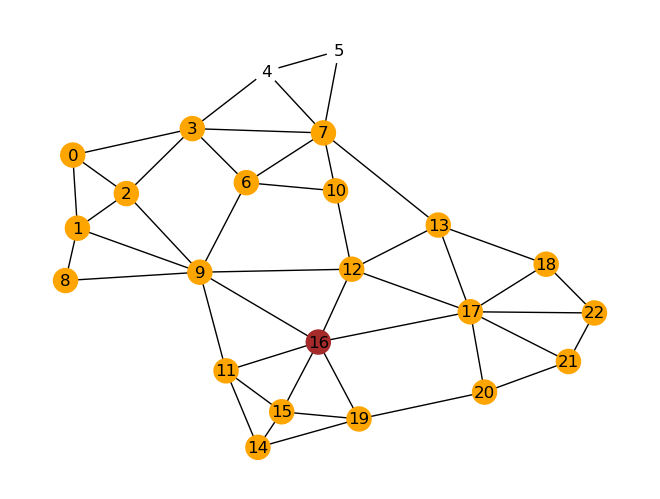

In [94]:
# TODO Find the nodes in the input layer that connect to node 16 in the output layer
# using the adjacency matrix
# Replace this line:
A3 = np.matmul(A2,A)
input_layer_nodes = norm_array(np.matmul(A3,X))

print("Input layer:")
print(input_layer_nodes)
draw_graph_structure(A, output_layer_nodes, input_layer_nodes)

This is bad news.  This is a fairly sparsely connected graph (i.e. adjacency matrix is mostly zeros) and there are only two hidden layers.  Nonetheless, **we have to involve almost all the nodes in the graph** to compute the loss at this output.

To resolve this problem, we'll use neighborhood sampling.  We'll start again with a single node in the output layer.

Output layer:


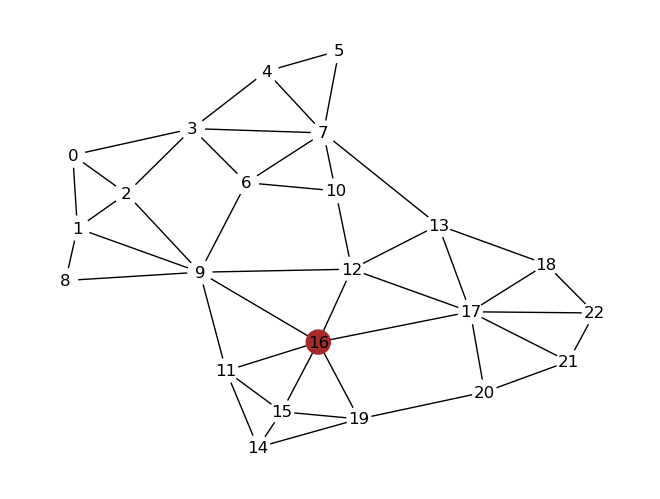

In [95]:
print("Output layer:")
draw_graph_structure(A, output_layer_nodes, neighbor_nodes)

In [96]:
# Define umber of neighbors to sample
n_sample = 3

Hidden layer 2 before sampling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]


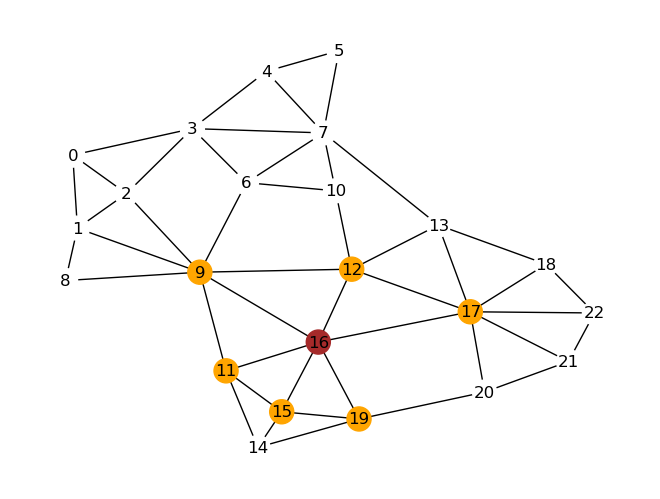

Hidden layer 2 after sampling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


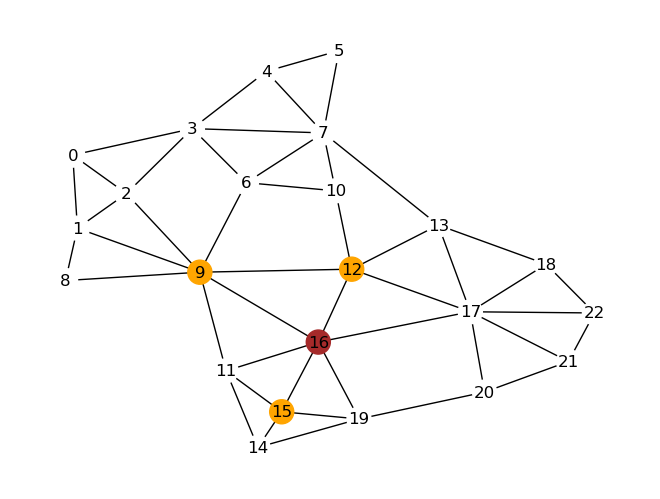

In [97]:
import random

# adjacent nodes to node 16
hidden_layer2_nodes = np.matmul(A,X)

print("Hidden layer 2 before sampling:")
print(hidden_layer2_nodes)
draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)

# indices for the nodes which are adjacent
inds = []
for i in range(n_nodes):
    if (hidden_layer2_nodes[i] == 1) and (i != 16):
       inds.append(i)
    
# get the sample of adjacent nodes
inds_sample_level2 = random.sample(inds,n_sample)
    
# delete the nodes out of the sample
for i in range(n_nodes):
    if i not in inds_sample_level2:
        hidden_layer2_nodes[i] = 0
        
print("Hidden layer 2 after sampling:")
print(hidden_layer2_nodes)        
draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)        

Hidden layer 2 =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


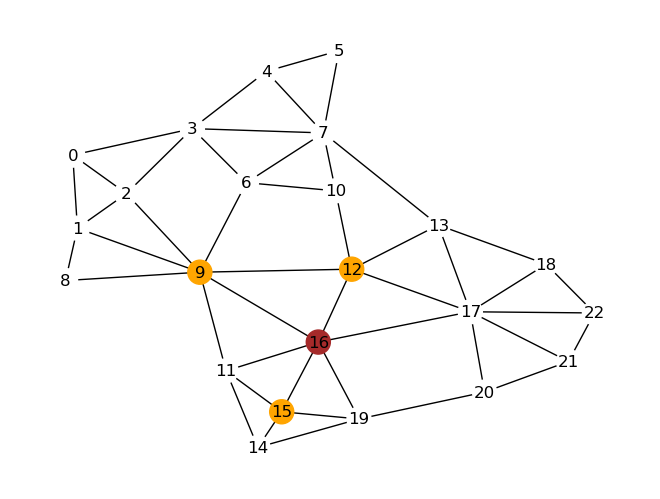

Hidden layer 1 before sampling =  [[0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.]]


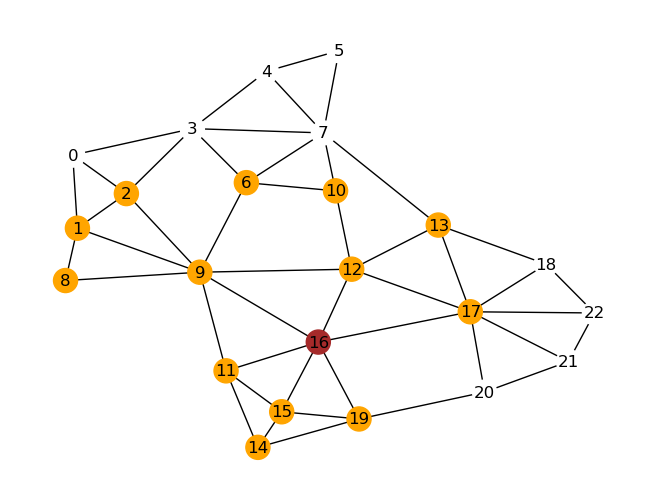

Hidden layer 1 after sampling =  [[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


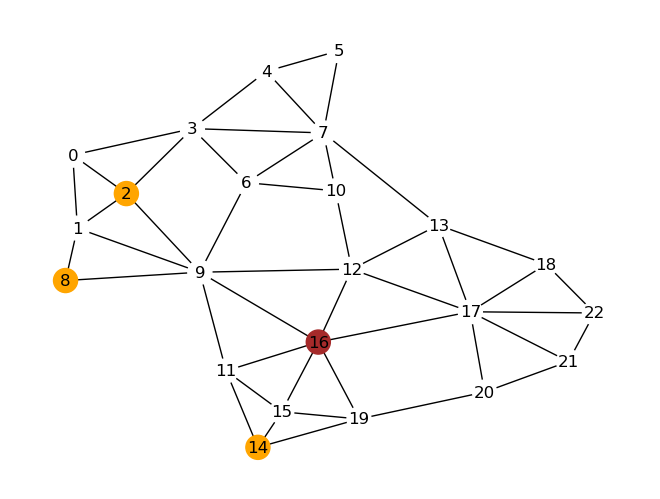

In [98]:
# TODO Find the nodes in hidden layer 1 that connect to the nodes in hidden layer 2
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.  Make sure not to sample nodes that were already included in hidden layer 2 
# or the output layer. The nodes at hidden layer 1 are the union of these nodes and the 
# nodes in hidden layer 2

# 1) Find the nodes in hidden layer 1 that connect to the nodes in hidden layer 2
#    using the adjacency matrix

print("Hidden layer 2 = ",hidden_layer2_nodes)
draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)

hidden_layer1_nodes = np.zeros((n_nodes,1));

for i in range(n_nodes):
    if (i != 16) and (hidden_layer2_nodes[i]==1): # the neighbors of 16 have already been considered
        hidden_layer1_nodes[i] = 1
        X = onehot(i)
        adjX = np.matmul(A,X) # get each neighbor of level 2 nodes
        for j in range(n_nodes):
            if adjX[j] > 0:
                hidden_layer1_nodes[j]  = 1 # includes the neighbor at level 1
                
print("Hidden layer 1 before sampling = ",hidden_layer1_nodes.T )       
draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes) 

        
# 2) sample n_sample of these nodes randomly without replacement.  Make sure not to sample 
#    nodes that were already included in hidden layer or the output layer    
    
# indices for the nodes which are adjacent - exclude those sampled right above
inds = []
for i in range(n_nodes):
    if (hidden_layer1_nodes[i] == 1) and (i != 16) and (i not in inds_sample_level2):
       inds.append(i)
    
# get the sample of adjacent nodes
inds_sample_level1 = random.sample(inds,n_sample)
    
# delete the nodes out of the sample
for i in range(n_nodes):
    if i not in inds_sample_level1:
        hidden_layer1_nodes[i] = 0
        
print("Hidden layer 1 after sampling = ",hidden_layer1_nodes.T )       
draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes)        

Hidden layer 1 =  [[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


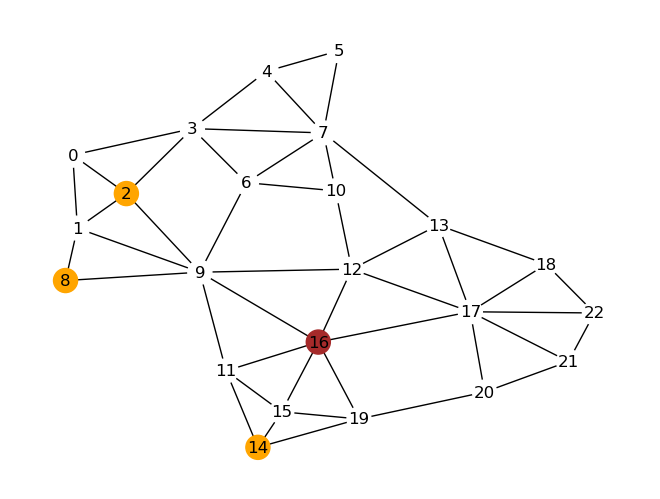

Input layer before sampling =  [[1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]]


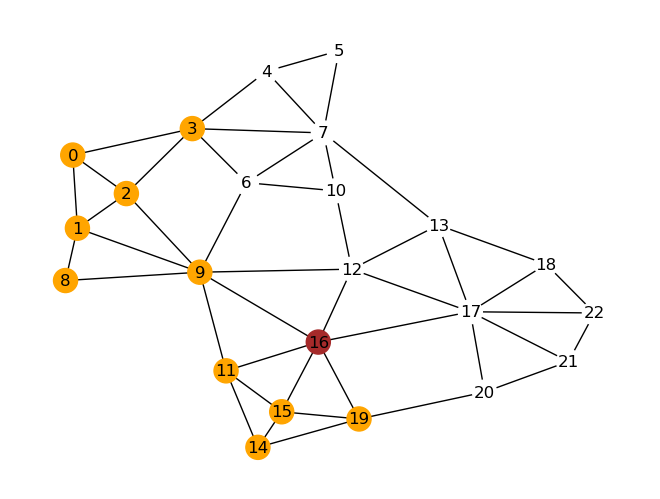

nodes for sampling = [0, 1, 3, 11, 19]
Input layer after sampling =  [[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]]


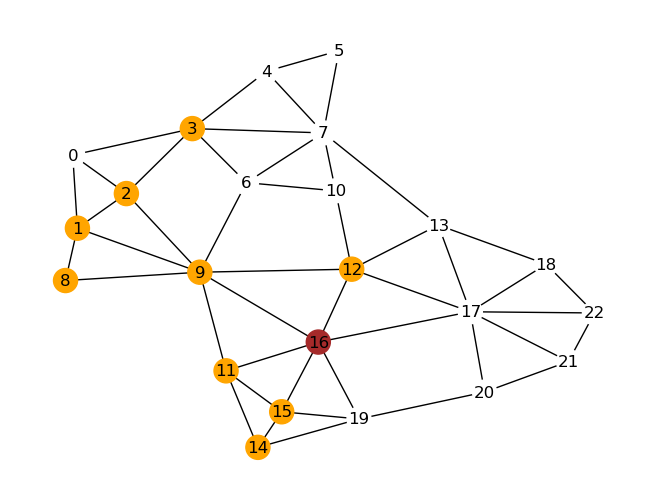

In [100]:
# TODO Find the nodes in the input layer that connect to the nodes in hidden layer 1
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.  Make sure not to sample nodes that were already included in hidden layer 1,2, or the output layer.
# The nodes at the input layer are the union of these nodes and the nodes in hidden layers 1 and 2


# 1)Find the nodes in the input layer that connect to the nodes in hidden layer 1
#   using the adjacency matrix.

print("Hidden layer 1 = ",hidden_layer1_nodes.T)
draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes)

input_layer_nodes = np.zeros((n_nodes,1));

for i in range(n_nodes):
    if (i != 16) and (hidden_layer1_nodes[i]==1): # the neighbors of 16 have already been considered
        input_layer_nodes[i] = 1
        X = onehot(i)
        adjX = np.matmul(A,X) # get each neighbor of level 1 nodes
        for j in range(n_nodes):
            if adjX[j] > 0:
                input_layer_nodes[j]  = 1 # includes the neighbor at input layer
                
print("Input layer before sampling = ",input_layer_nodes.T )       
draw_graph_structure(A, output_layer_nodes, input_layer_nodes)


# 2) sample n_sample of these nodes randomly without replacement.  Make sure not to 
#    sample nodes that were already included in hidden layer 1,2, or the output layer.



# indices for the nodes which are adjacent - exclude those sampled right above
inds = []
for i in range(n_nodes):
    if (input_layer_nodes[i] == 1) and (i != 16) and (i not in inds_sample_level2) and (i not in inds_sample_level1):
       inds.append(i)

print("nodes for sampling =",inds)    
    
    
# get the sample of adjacent nodes
inds_sample_input_layer = random.sample(inds,n_sample)
    
# delete the nodes out of the sample
for i in range(n_nodes):
    if i not in inds_sample_input_layer:
        input_layer_nodes[i] = 0


# The nodes at the input layer are the union of these nodes and the nodes in hidden 
# layers 1 and 2

for i in range(n_nodes):
    input_layer_nodes[i] = input_layer_nodes[i] + hidden_layer1_nodes[i] + hidden_layer2_nodes[i]


print("Input layer after sampling = ",input_layer_nodes.T )       
draw_graph_structure(A, output_layer_nodes, input_layer_nodes)  

If you did this correctly, there should be 9 yellow nodes in the figure.  The "receptive field" of node 16 in the output layer increases much more slowly as we move back through the layers of the network.